## Module importation

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data creation with noise (randomness)

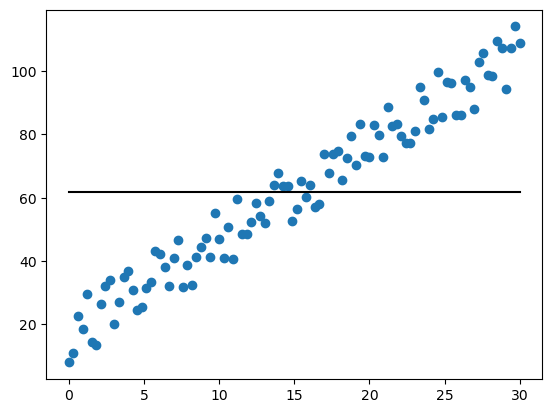

In [94]:
X = np.linspace(0, 30, 100)
Y = 3 * X + 7 + np.random.randint(0, 20, (100,))
plt.scatter(X, Y)
plt.plot(X, np.ones((100,)) * Y.mean(), color='black')

## Training the sklearn implementation to see results

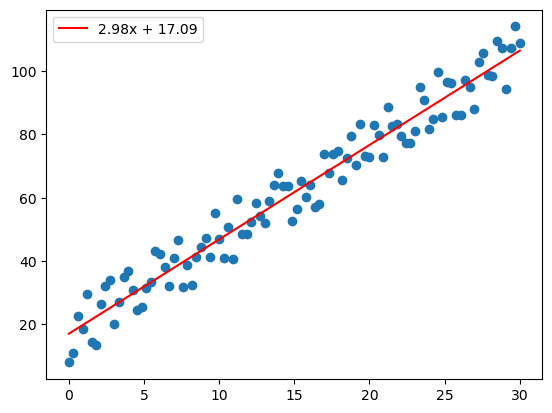

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(X.reshape(-1,1), Y)

coef, intercept = np.round(model.coef_.item(),2), np.round(model.intercept_,2)

plt.scatter(X, Y)
plt.plot(X.reshape(-1,1), model.predict(X.reshape(-1,1)), color='r', label=f"{coef}x + {intercept}")
plt.legend()

## Coding my own implementation

In [96]:
class MyLinearRegression():
    
    def __init__(self, L = 0.0001):
        # L is how fast we converge, but also how precisely : a tradeoff
        self.L = L
        self.a = 0
        self.b = 0
    
    def mse(self):
        # Calculating mean squared error used in the gradient descent algorithm (train)
        return (1/self.N) * ((self.Y - self.a * self.X - self.b) ** 2).sum()
    
    # Find solution using gradient descent
    def train(self, X, Y, epochs=100_000):
        self.X = X
        self.Y = Y
        self.N = self.X.shape[0]
        for i in range(epochs + 1):
            if i % 10000 == 0:
                error = self.mse()
                print(f"Epoche #{i}. Current error : {error}")
            # Calculating derivatives
            da = 2/self.N * (self.X.dot(self.a * self.X + self.b - self.Y)).sum()
            db = 2/self.N * (self.a * self.X + self.b - self.Y).sum()
            
            # Updating current parameters in the opposite side from the derivative
            self.a -= self.L * da
            self.b -= self.L * db
    
    def predict_train(self, input_):
        return self.a * input_ + self.b
    
    # Solve solution using linear algebra
    def solve(self, X, Y):
        self.X = X
        self.Y = Y
        self.N = self.X.shape[0]
        # Adding a column of ones to account for an intercept
        X = np.column_stack((np.ones((self.N),), self.X))
        self.beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    
    def predict_solve(self, input_):
        return (input_ * self.beta[1:].T).sum(axis=1) + self.beta[0]
    
    def parameters(self, rounded=False):
        if rounded:
            return round(self.a, 2), round(self.b, 2)
        return self.a, self.b

In [97]:
my_model = MyLinearRegression()
my_model.train(X, Y, epochs=50_000)
my_model.solve(X, Y)

Epoche #0. Current error : 4529.198181818182
Epoche #10000. Current error : 59.50144719938848
Epoche #20000. Current error : 42.741562276336055
Epoche #30000. Current error : 36.65310112568129
Epoche #40000. Current error : 34.44131033157838
Epoche #50000. Current error : 33.637820189188


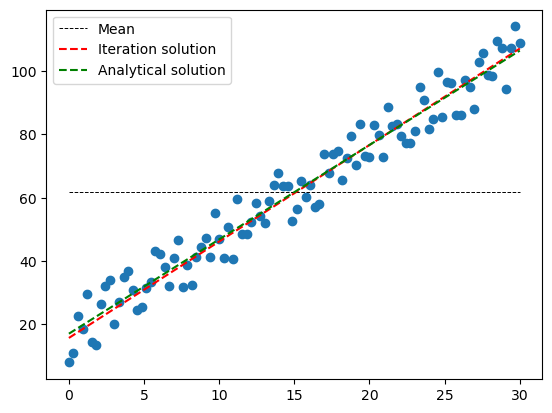

In [98]:
plt.scatter(X, Y)
plt.plot(X, np.ones((100,)) * Y.mean(), color="black", linestyle="--", linewidth=0.7, label="Mean")
plt.plot(X, my_model.predict_train(X.reshape(-1,1)), color="red", label="Iteration solution", linestyle="--")
plt.plot(X, my_model.predict_solve(X.reshape(-1,1)), color="green", label="Analytical solution", linestyle="--")
plt.legend()

## Solving polynomial relationship by inputing powers of the features

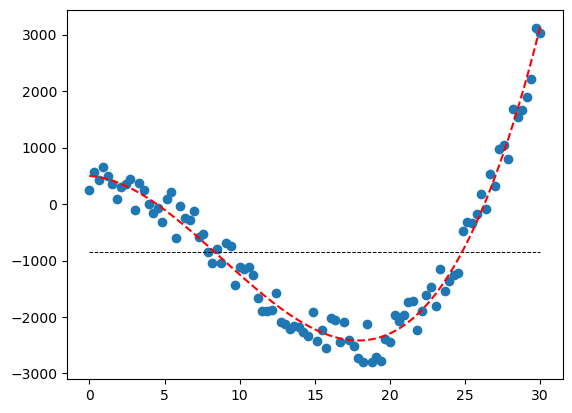

In [100]:
X2 = np.linspace(0, 30, 100)
Y2 = X**3 - 27*X**2 + 72 + np.random.randint(0, 800, (100,))
X2_powers = np.column_stack((X2, np.power(X2, 2), np.power(X2, 3)))

my_model.solve(X2_powers, Y2)
plt.scatter(X2, Y2)
plt.plot(X2, np.ones((100,)) * Y2.mean(), color="black", linestyle="--", linewidth=0.7)
plt.plot(X2, my_model.predict_solve(X2_powers), color="red", linestyle="--")